In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [3]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data.shape

(397, 6)

In [5]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
data['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [9]:
data['rank'].nunique()

3

In [10]:
data['discipline'].unique()

array(['B', 'A'], dtype=object)

In [11]:
data.shape[0]

397

In [12]:
df_visualization_nominal=data[['rank','discipline','sex']].copy()

In [13]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

# Visualization of the Data:

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


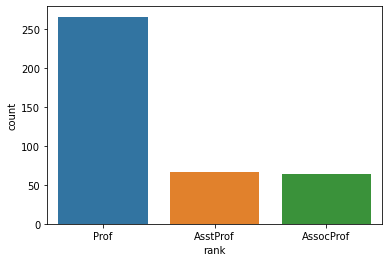

In [14]:
ax=sns.countplot(x="rank",data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

From the above Observation:

    total prof :266
    
    total ass prof:67
    
    total Assoc Prof:64

B    216
A    181
Name: discipline, dtype: int64


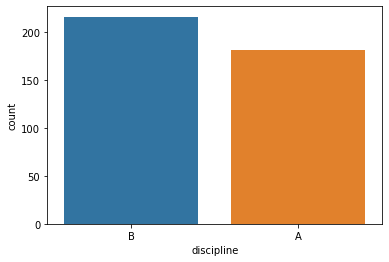

In [15]:
ax=sns.countplot(x="discipline",data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


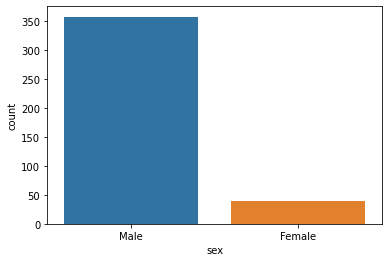

In [16]:
ax=sns.countplot(x="sex",data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

# Making DataFrame of Ordinal Data

In [17]:
df_vis_ordinal=data[['yrs.since.phd','yrs.service']].copy()

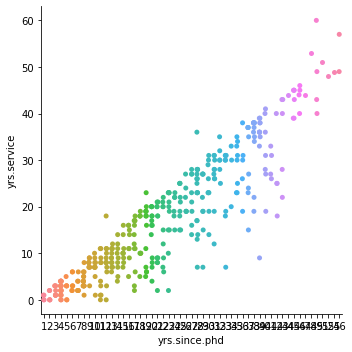

In [19]:
sns.catplot(x="yrs.since.phd",y="yrs.service",data=df_vis_ordinal)

# Encoding the DataFrame

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [21]:
for col in data.columns:
    if data[col].dtypes=="object":
        data[col]=enc.fit_transform(data[col].values.reshape(-1,1))

In [22]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

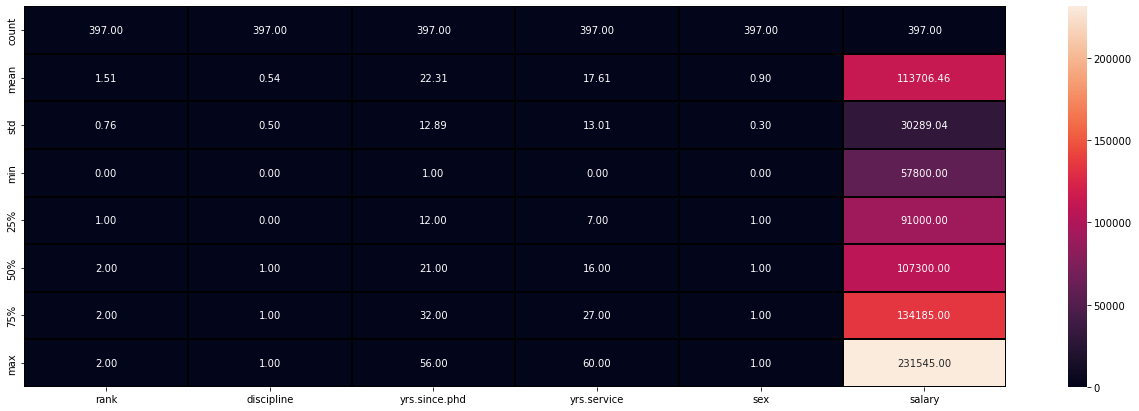

In [23]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [24]:
data.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

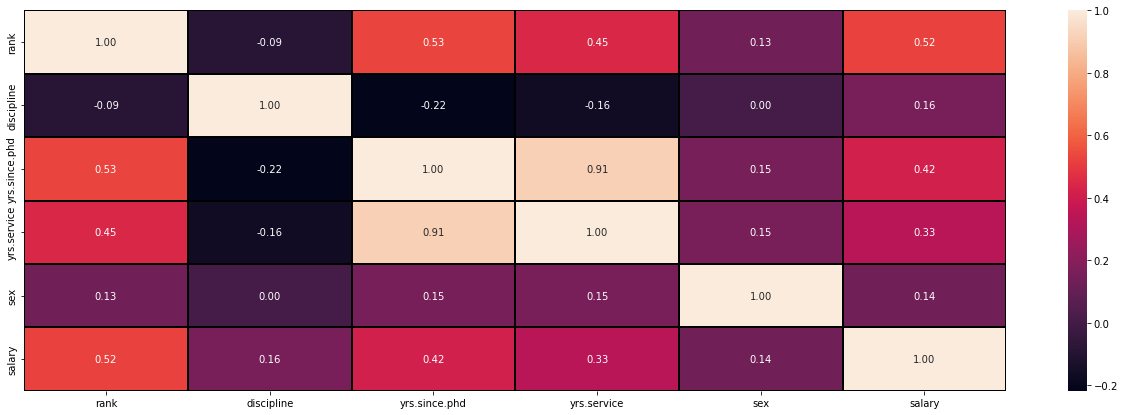

In [25]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Checking the columns which are positively and negative correlated with the target columns:

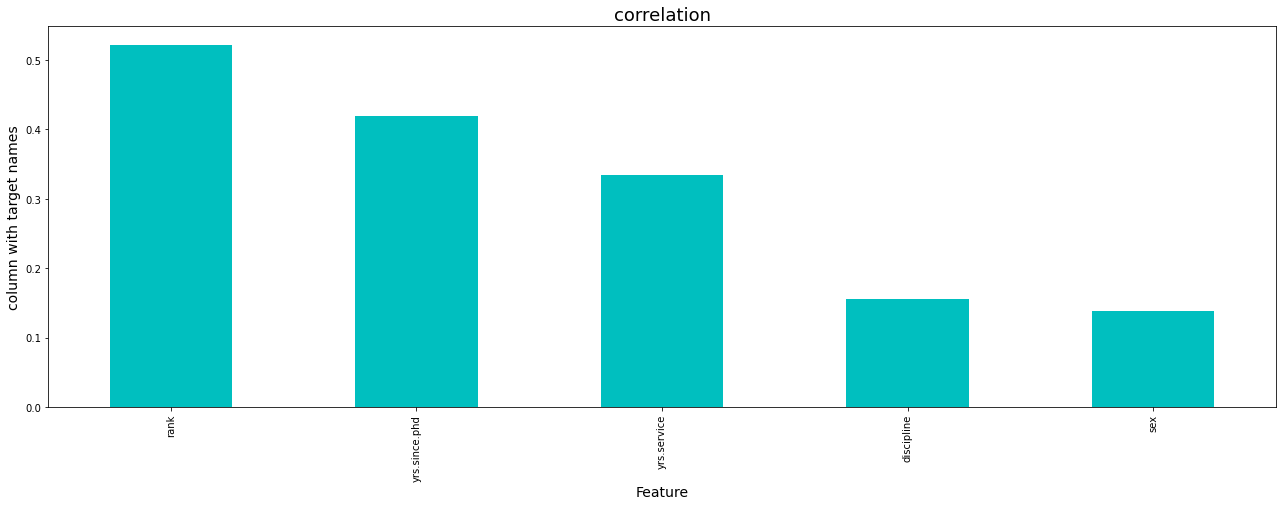

In [26]:
plt.figure(figsize=(22,7))
data.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [27]:
data.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [28]:
data.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

# checking the outliers on the int and float type of columns

<AxesSubplot:>

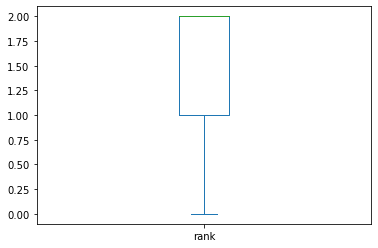

In [29]:
data['rank'].plot.box()

In [30]:
#if data have outliers then they have circle points on box.

<AxesSubplot:>

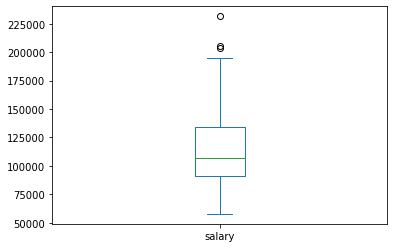

In [31]:
data['salary'].plot.box()

Target column don't need to remove outliers

In [32]:
data['discipline'].unique()

array([1., 0.])

In [33]:
data.shape

(397, 6)

In [34]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [35]:
df_new_z=data[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [36]:
df_new_z.shape

(354, 6)

In [37]:
## Percentage loss of data:
Data_loss=((397-354)/397)*100
Data_loss

10.831234256926953

# Seprating the columns into feature and target :

In [38]:
features=data.drop('salary',axis=1)
#features=data.drop('sex',axis=1)
target=data['salary']

# Scaling the data using Min Max Scaler:

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
lr=LinearRegression()
from sklearn.metrics import r2_score

In [40]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.3611999954853077
At random state 0,the testing accuracy is:- 0.4079258314975236


At random state 1,the training accuracy is:- 0.3604245854198438
At random state 1,the testing accuracy is:- 0.41633641876629457


At random state 2,the training accuracy is:- 0.37547390964955596
At random state 2,the testing accuracy is:- 0.3600189554526694


At random state 3,the training accuracy is:- 0.3847313825130595
At random state 3,the testing accuracy is:- 0.3293529875010861


At random state 4,the training accuracy is:- 0.38517450334380465
At random state 4,the testing accuracy is:- 0.304400813331562


At random state 5,the training accuracy is:- 0.3950033630150771
At random state 5,the testing accuracy is:- 0.2752907752774737


At random state 6,the training accuracy is:- 0.3650308031752799
At random state 6,the testing accuracy is:- 0.40189870806075667


At random state 7,the training accuracy is:- 0.3575963886324032
At random state 7,the testing 

At random state 68,the training accuracy is:- 0.4112434481572016
At random state 68,the testing accuracy is:- 0.18760305905186425


At random state 69,the training accuracy is:- 0.3583537425297256
At random state 69,the testing accuracy is:- 0.4055461597734453


At random state 70,the training accuracy is:- 0.40782071088368554
At random state 70,the testing accuracy is:- 0.12457420628140248


At random state 71,the training accuracy is:- 0.3798566422299212
At random state 71,the testing accuracy is:- 0.3310077740650834


At random state 72,the training accuracy is:- 0.37306545398657165
At random state 72,the testing accuracy is:- 0.33282576705225164


At random state 73,the training accuracy is:- 0.3684736133822437
At random state 73,the testing accuracy is:- 0.37565170848674045


At random state 74,the training accuracy is:- 0.36328541761317845
At random state 74,the testing accuracy is:- 0.4145405703104328


At random state 75,the training accuracy is:- 0.3699093187667537
At random s

In [41]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [42]:
#train the model
lr.fit(features_train,target_train)

LinearRegression()

In [43]:
pred_test=lr.predict(features_test)

In [44]:
print(r2_score(target_test,pred_test))

0.34397033297856505


# Cross-validation of the model


In [46]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and acuuracy score for training is {Train_accuracy} and accuracy for the testing is {Train_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.32708011674065096 and acuuracy score for training is -0.29698823968926513 and accuracy for the testing is -0.29698823968926513


At cross fold 3 the cv score is 0.32033286730598787 and acuuracy score for training is -0.29698823968926513 and accuracy for the testing is -0.29698823968926513


At cross fold 4 the cv score is 0.3218196693768359 and acuuracy score for training is -0.29698823968926513 and accuracy for the testing is -0.29698823968926513


At cross fold 5 the cv score is 0.29569928663871775 and acuuracy score for training is -0.29698823968926513 and accuracy for the testing is -0.29698823968926513


At cross fold 6 the cv score is 0.33096341839295546 and acuuracy score for training is -0.29698823968926513 and accuracy for the testing is -0.29698823968926513


At cross fold 7 the cv score is 0.3257704419996536 and acuuracy score for training is -0.29698823968926513 and accuracy for the testing is -0.29698823968926513


At cross fold 8 the cv s

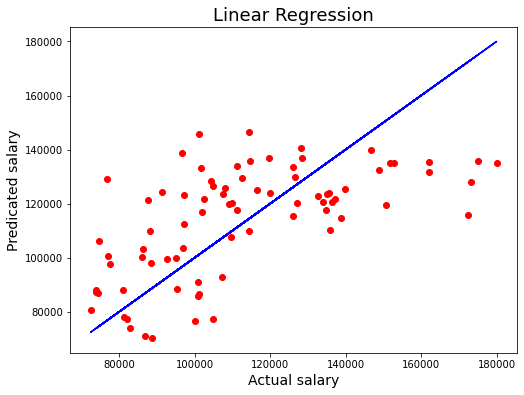

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual salary',fontsize=14)
plt.ylabel('Predicated salary',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

In [48]:
features=data.drop('sex',axis=1)

In [49]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- 1.0


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- 1.0


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- 1.0


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 1.0


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 1.0


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- 1.0


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- 1.0


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- 1.0


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing accuracy is:- 1.0


At random state 9,the training accuracy is:- 1.0
At random state 9,the testing accuracy is:- 1.0


At random 

At random state 95,the training accuracy is:- 1.0
At random state 95,the testing accuracy is:- 1.0


At random state 96,the training accuracy is:- 1.0
At random state 96,the testing accuracy is:- 1.0


At random state 97,the training accuracy is:- 1.0
At random state 97,the testing accuracy is:- 1.0


At random state 98,the training accuracy is:- 1.0
At random state 98,the testing accuracy is:- 1.0


At random state 99,the training accuracy is:- 1.0
At random state 99,the testing accuracy is:- 1.0




In [50]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [51]:
#train the model
lr.fit(features_train,target_train)

LinearRegression()

In [52]:
pred_test=lr.predict(features_test)

In [53]:
print(r2_score(target_test,pred_test))

1.0


# Cross-validation of the model Again

In [54]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and acuuracy score for training is {Train_accuracy} and accuracy for the testing is {Train_accuracy}")
    print("\n")

At cross fold 2 the cv score is 1.0 and acuuracy score for training is -0.9285672682474582 and accuracy for the testing is -0.9285672682474582


At cross fold 3 the cv score is 1.0 and acuuracy score for training is -0.9285672682474582 and accuracy for the testing is -0.9285672682474582


At cross fold 4 the cv score is 1.0 and acuuracy score for training is -0.9285672682474582 and accuracy for the testing is -0.9285672682474582


At cross fold 5 the cv score is 1.0 and acuuracy score for training is -0.9285672682474582 and accuracy for the testing is -0.9285672682474582


At cross fold 6 the cv score is 1.0 and acuuracy score for training is -0.9285672682474582 and accuracy for the testing is -0.9285672682474582


At cross fold 7 the cv score is 1.0 and acuuracy score for training is -0.9285672682474582 and accuracy for the testing is -0.9285672682474582


At cross fold 8 the cv score is 1.0 and acuuracy score for training is -0.9285672682474582 and accuracy for the testing is -0.9285

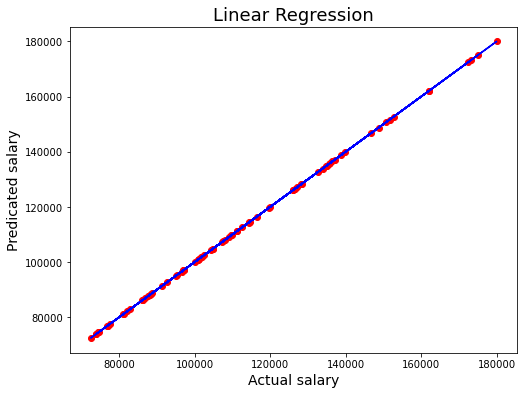

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual salary',fontsize=14)
plt.ylabel('Predicated salary',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization:

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [57]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [58]:
#final model training
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

100.0

In [59]:
ped_ls=ls.predict(features_test)

In [60]:
lss=r2_score(target_test,pred_ls)
lss*100

100.0

In [61]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

100.0

# Ensemble Technique:

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [63]:

rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decission=rf.predict(features_test)

rfs=r2_score(target_test,pred_decission)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 99.9877022348456
Cross Val Score: 99.62026051435032


In [64]:
import pickle
filename='salary.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [65]:
loaded_model=pickle.load(open('salary.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

99.9877022348456


In [66]:
con=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decission[:]],index=["Predict","Orginal"])

In [67]:
con

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Predict,101885.74,114462.45,116394.32,173385.39,77162.36,107364.4,100989.22,74972.46,134615.29,133968.24,...,73918.83,95516.58,126289.16,92649.05,88641.34,95482.06,127038.7,85490.94,146865.33,126354.79
Orginal,101885.74,114462.45,116394.32,173385.39,77162.36,107364.4,100989.22,74972.46,134615.29,133968.24,...,73918.83,95516.58,126289.16,92649.05,88641.34,95482.06,127038.7,85490.94,146865.33,126354.79
